<p><b>Details of Author</b></p>
<p>Name: <b>Ahmed Ramadan Bamidele</b></p>
<p> Email: <b>ramadan1.mt@gmail.com</b></p>

<b> SECTION 1: SCRAPING, VISUALIZING AND EXPORTING DATA</b>

**PART 1: IMPORTING THE NEEDED LIBRARIES**

In [1]:
import re
from functools import reduce
from itertools import combinations as com
from typing import List
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**PART 2: SCRAPING SKINCARE PRODUCTS FROM NIVEA'S STORE ON JUMIA**

**To scrape the data succesfully, ensure that Internet connection is available and that the signal is strong**
If function does not work, check to see if the connection is aborted, then retry shortly after

In [2]:
def product_scraper(url_s: List[str]) -> pd.DataFrame:
    #Main field table
    table_init = [["Product ID", "Product Line Name", "Brand Name", "Product Name", "Product Description", "Product Images", "Barcode (EAN/UPC)", "Price", "Size/Volume", "Ingredients", "Skin Concern", "Source URL"]]
    for url in url_s:
        #Accessing the url of the product
        page = requests.get(url)
        soup = BeautifulSoup(page.text, "html")
        #The list contains all the information of the product, after which it will be appended to table_init
        product_specific_list1 = []
        #Getting the id of the first product from url
        kd = url.split(".html")[0].split("-")
        id_ = kd[len(kd) - 1]
        product_specific_list1.append(id_)
        #product line name
        product_line_name = np.nan
        product_specific_list1.append(product_line_name)
        #Brand name from  title
        title_tag = soup.find("title")
        Brand_name = title_tag.text.split("+")[0].split()[0]
        product_specific_list1.append(Brand_name)
        #Getting the product name and add it to product_specific_list
        title_tag = soup.find("title")
        product_name = title_tag.text.split("+")[0]
        product_specific_list1.append(product_name)
        #Getting the description 0f the product
        description_tag = soup.find("div", class_="markup -mhm -pvl -oxa -sc").text.split('\n')
        description = description_tag[0]# + description_tag[1]
        product_specific_list1.append(description)
        #Getting the image link/url
        img_link = soup.find_all("img")[1].get("data-src")
        product_specific_list1.append(img_link)
        #Getting the UPC/SKU/EAN
        sku_tag = soup.find_all("li", class_="-pvxs")[0].text.split()[1]
        product_specific_list1.append(sku_tag)
        #Getting the price
        price_tag = soup.find_all("span", class_="-b -ubpt -tal -fs24 -prxs")[0].text
        product_specific_list1.append(price_tag)
        #Getting the size/volume
        k_elem = soup.title.text.split("ml")[0].split(" ")
        volume_ml = k_elem[len(k_elem) - 1]
        product_specific_list1.append(volume_ml)
        #Getting the ingredients
        ingredients = (soup.find("div", class_="markup -mhm -pvl -oxa -sc").text.split('INGREDIENTS'))[1].strip()
        product_specific_list1.append(ingredients)
        #getting the skin concern
        skin_concern = 'dry skin'
        product_specific_list1.append(skin_concern)
        #Product url
        product_url = url
        product_specific_list1.append(url)
        #Adding new product details to main table list
        table_init.append(product_specific_list1)
    #Main field table in dataframe 
    df_table = pd.DataFrame(table_init[1:], columns=table_init[0])
    df_table
    return df_table

In [3]:
url_s = ["https://www.jumia.com.ng/nourishing-cocoa-body-lotion-400ml-free-dry-fresh-roll-on-for-men-50ml-nivea-mpg1657713.html", "https://www.jumia.com.ng/natural-fairness-clarifiant-for-women-400ml-pack-of-2-nivea-mpg1657699.html", "https://www.jumia.com.ng/doshakara-pack-nourishing-cocoa-body-lotion-400mlpack-of-3-nivea-mpg1657642.html", "https://www.jumia.com.ng/nivea-radiant-beauty-even-glow-body-lotion-for-women-400ml-pack-of-2-104325862.html", "https://www.jumia.com.ng/dry-comfort-roll-on-for-women-48h-50ml-pack-of-3-nivea-mpg1657646.html", "https://www.jumia.com.ng/nivea-sun-uv-sunscreen-face-shine-control-cream-spf-50-50ml-404436340.html", "https://www.jumia.com.ng/nivea-men-deep-aftershave-lotion-100ml-117097341.html", "https://www.jumia.com.ng/perfect-radiant-day-cream-and-face-cleansing-foam-er-body-lotion-100ml-nivea-mpg1657697.html", "https://www.jumia.com.ng/nivea-radiant-beauty-advanced-care-body-lotion-for-women-400ml-104320986.html", "https://www.jumia.com.ng/nivea-men-deep-espresso-deodorant-spray-200ml-pack-of-2-117097338.html", "https://www.jumia.com.ng/nivea-soft-cream-200ml-383942170.html", "https://www.jumia.com.ng/nivea-orange-avocado-oil-shower-gel-for-women-500ml-379731180.html", "https://www.jumia.com.ng/nivea-nivea-dry-impact-anti-perspirant-spray-for-men-72h-200ml-149878455.html", "https://www.jumia.com.ng/3-for-2-strawberry-shine-lip-balm-for-women-4.8g-nivea-mpg1657717.html", "https://www.jumia.com.ng/perfect-radiant-eventone-day-cream-and-face-cleansing-foam-for-women-nivea-mpg1657665.html", "https://www.jumia.com.ng/nivea-watermelon-shine-lip-balm-for-women-4.8g-149878472.html", "https://www.jumia.com.ng/nivea-men-creme-all-purpose-cream-for-men-150ml-pack-of-2-104327541.html", "https://www.jumia.com.ng/nivea-dry-comfort-roll-on-for-women-72h-50ml.-383942167.html"]
df_table = product_scraper(url_s)
df_table

,Product ID,Product Line Name,Brand Name,Product Name,Product Description,Product Images,Barcode (EAN/UPC),Price,Size/Volume,Ingredients,Skin Concern,Source URL
0,mpg1657713,NaN,NIVEA,NIVEA MEN Deep Body Lotion 400ml,NIVEA MEN Deep Body Lotion hydrates your skin ...,https://ng.jumia.is/unsafe/fit-in/500x500/filt...,NI930ST265LM4NAFAMZ,"₦ 6,890",400,"Deep Body Lotion: Water, Glycerin, Dimathicone...",dry skin,https://www.jumia.com.ng/nourishing-cocoa-body...
1,mpg1657699,NaN,NIVEA,NIVEA Perfect & Radiant Body Lotion For Women ...,NIVEA Perfect & Radiant Body Lotion is a daily...,https://ng.jumia.is/unsafe/fit-in/500x500/filt...,NI930ST1WKIRWNAFAMZ,"₦ 7,205",400,"Aqua, Dimethicone, Ethylhexyl Methoxycinnamate...",dry skin,https://www.jumia.com.ng/natural-fairness-clar...
2,mpg1657642,NaN,NIVEA,NIVEA DoShakara Pack - Nourishing Cocoa Body L...,NIVEA Nourishing Cocoa Body Lotion provides 48...,https://ng.jumia.is/unsafe/fit-in/500x500/filt...,NI930ST32OJ5WNAFAMZ,"₦ 10,175",400,": Aqua, Glycerin, Cetearyl Alcohol, Isohexadec...",dry skin,https://www.jumia.com.ng/doshakara-pack-nouris...
3,104325862,NaN,NIVEA,NIVEA Radiant & Beauty Even Glow Body Lotion F...,NIVEA Radiant & Beauty Even Glow is formulated...,https://ng.jumia.is/unsafe/fit-in/500x500/filt...,NI930ST23IVW4NAFAMZ,"₦ 8,555",400,": Aqua, Glycerin, Paraffinum, Liquidum, Cetear...",dry skin,https://www.jumia.com.ng/nivea-radiant-beauty-...
4,mpg1657646,NaN,NIVEA,"NIVEA Dry Comfort Roll-on For Women, 72h- 50ml...",NIVEA Dry Comfort anti-perspirant deodorant of...,https://ng.jumia.is/unsafe/fit-in/500x500/filt...,NI930ST2Q7I1GNAFAMZ,"₦ 4,505",50,"Water, Aluminum Chlorohydrate, PPG-15 Stearyl ...",dry skin,https://www.jumia.com.ng/dry-comfort-roll-on-f...
5,404436340,NaN,NIVEA,NIVEA Sun UV Sunscreen Face Shine Control Crea...,NIVEA SUN UV Face Shine Control Cream provides...,https://ng.jumia.is/unsafe/fit-in/500x500/filt...,NI930ST6OQWTSNAFAMZ,"₦ 8,345",50,"Aqua, Homosalate, Butyl Methoxydibenzoylmethan...",dry skin,https://www.jumia.com.ng/nivea-sun-uv-sunscree...
6,117097341,NaN,NIVEA,NIVEA MEN Deep Aftershave Lotion - 100ml | Jum...,NIVEA MEN DEEP COMFORT After Shave Lotion supp...,https://ng.jumia.is/unsafe/fit-in/500x500/filt...,DE974ST1W3JGFNAFAMZ,"₦ 2,525",100,"Aqua, Alcohol Denat., Propylene Glycol, PEG-40...",dry skin,https://www.jumia.com.ng/nivea-men-deep-afters...
7,mpg1657697,NaN,NIVEA,NIVEA Perfect & Radiant Even Tone Day And Nigh...,NIVEA Perfect & Radiant Even Tone Day Cream SP...,https://ng.jumia.is/unsafe/fit-in/500x500/filt...,NI930ST21XF7WNAFAMZ,"₦ 8,260",50,Perfect & Radiant Even Tone Day Cream SPF 15: ...,dry skin,https://www.jumia.com.ng/perfect-radiant-day-c...
8,104320986,NaN,NIVEA,NIVEA Radiant & Beauty Advanced Care Body Loti...,NIVEA Radiant & Beauty Advanced Care is formul...,https://ng.jumia.is/unsafe/fit-in/500x500/filt...,NI930ST2SK5VONAFAMZ,"₦ 5,000",400,": Aqua, Glycerin, Paraffinum, Liquidum, Cetear...",dry skin,https://www.jumia.com.ng/nivea-radiant-beauty-...
9,117097338,NaN,NIVEA,NIVEA MEN Deep Espresso Deodorant Spray - 200m...,NIVEA MEN DEEP Antibacterial Anti-perspirant p...,https://ng.jumia.is/unsafe/fit-in/500x500/filt...,DE974ST316G73NAFAMZ,"₦ 7,330",200,"Propane, Cyclomethicone, Aluminum Chlorohydrat...",dry skin,https://www.jumia.com.ng/nivea-men-deep-espres...


**PART 3: CLEANING AND EXPORTING THE CLEANED DATA TO A CSV FILE**

In [4]:
#Printing the first 5 rows
df_table.head()

,Product ID,Product Line Name,Brand Name,Product Name,Product Description,Product Images,Barcode (EAN/UPC),Price,Size/Volume,Ingredients,Skin Concern,Source URL
0,mpg1657713,NaN,NIVEA,NIVEA MEN Deep Body Lotion 400ml,NIVEA MEN Deep Body Lotion hydrates your skin ...,https://ng.jumia.is/unsafe/fit-in/500x500/filt...,NI930ST265LM4NAFAMZ,"₦ 6,890",400,"Deep Body Lotion: Water, Glycerin, Dimathicone...",dry skin,https://www.jumia.com.ng/nourishing-cocoa-body...
1,mpg1657699,NaN,NIVEA,NIVEA Perfect & Radiant Body Lotion For Women ...,NIVEA Perfect & Radiant Body Lotion is a daily...,https://ng.jumia.is/unsafe/fit-in/500x500/filt...,NI930ST1WKIRWNAFAMZ,"₦ 7,205",400,"Aqua, Dimethicone, Ethylhexyl Methoxycinnamate...",dry skin,https://www.jumia.com.ng/natural-fairness-clar...
2,mpg1657642,NaN,NIVEA,NIVEA DoShakara Pack - Nourishing Cocoa Body L...,NIVEA Nourishing Cocoa Body Lotion provides 48...,https://ng.jumia.is/unsafe/fit-in/500x500/filt...,NI930ST32OJ5WNAFAMZ,"₦ 10,175",400,": Aqua, Glycerin, Cetearyl Alcohol, Isohexadec...",dry skin,https://www.jumia.com.ng/doshakara-pack-nouris...
3,104325862,NaN,NIVEA,NIVEA Radiant & Beauty Even Glow Body Lotion F...,NIVEA Radiant & Beauty Even Glow is formulated...,https://ng.jumia.is/unsafe/fit-in/500x500/filt...,NI930ST23IVW4NAFAMZ,"₦ 8,555",400,": Aqua, Glycerin, Paraffinum, Liquidum, Cetear...",dry skin,https://www.jumia.com.ng/nivea-radiant-beauty-...
4,mpg1657646,NaN,NIVEA,"NIVEA Dry Comfort Roll-on For Women, 72h- 50ml...",NIVEA Dry Comfort anti-perspirant deodorant of...,https://ng.jumia.is/unsafe/fit-in/500x500/filt...,NI930ST2Q7I1GNAFAMZ,"₦ 4,505",50,"Water, Aluminum Chlorohydrate, PPG-15 Stearyl ...",dry skin,https://www.jumia.com.ng/dry-comfort-roll-on-f...


In [5]:
df_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product ID           18 non-null     object 
 1   Product Line Name    0 non-null      float64
 2   Brand Name           18 non-null     object 
 3   Product Name         18 non-null     object 
 4   Product Description  18 non-null     object 
 5   Product Images       18 non-null     object 
 6   Barcode (EAN/UPC)    18 non-null     object 
 7   Price                18 non-null     object 
 8   Size/Volume          18 non-null     object 
 9   Ingredients          18 non-null     object 
 10  Skin Concern         18 non-null     object 
 11  Source URL           18 non-null     object 
dtypes: float64(1), object(11)
memory usage: 1.8+ KB


In [6]:
df_table.shape

(18, 12)

In [7]:
#Cleaning the volume column, indicating that the volume is in mL
df_table["Volume in mL"] = df_table["Size/Volume"]

In [8]:
#dropping the Size/Volume column
df_table.drop("Size/Volume", axis=1, inplace=True)

In [9]:
#Removing the dash in the volume column
df_table["Volume in mL"] = df_table["Volume in mL"].str.strip("-")

In [10]:
#Converting "Nigeria" in volume to numpy NaN
df_table["Volume in mL"] = df_table["Volume in mL"].replace("Nigeria", np.nan)

In [11]:
#Converting volume data type to float
df_table["Volume in mL"] = df_table["Volume in mL"].astype(float)

In [12]:
#Indicate SKU in the barcode field. EAN/UPC numbers were not found
df_table["Barcode (EAN/UPC/SKU)"] = df_table["Barcode (EAN/UPC)"]

In [13]:
df_table.drop("Barcode (EAN/UPC)", axis=1, inplace=True)

In [14]:
#cleaning the ingredients column
df_table["Ingredients"] = df_table["Ingredients"].str.strip(":")

In [15]:
#Cleaning the price column
df_table["Price"] = df_table["Price"].str.strip("₦")

In [16]:
df_table["Price"] = df_table["Price"].str.replace(",", "")

In [17]:
df_table["Price"] = df_table["Price"].astype(float)

In [18]:
df_table["Price_in_Naira"] = df_table["Price"]

In [19]:
df_table.drop("Price", axis=1, inplace=True)

**VISUALIZING THE DATA**

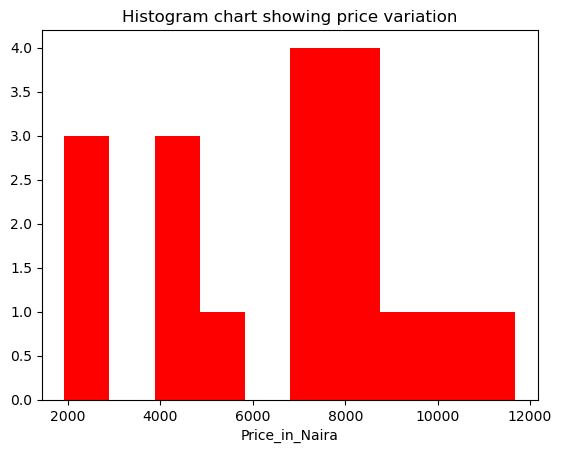

In [20]:
#Price histogram
plt.hist(df_table["Price_in_Naira"], color = "red")
plt.title("Histogram chart showing price variation")
plt.xlabel("Price_in_Naira");


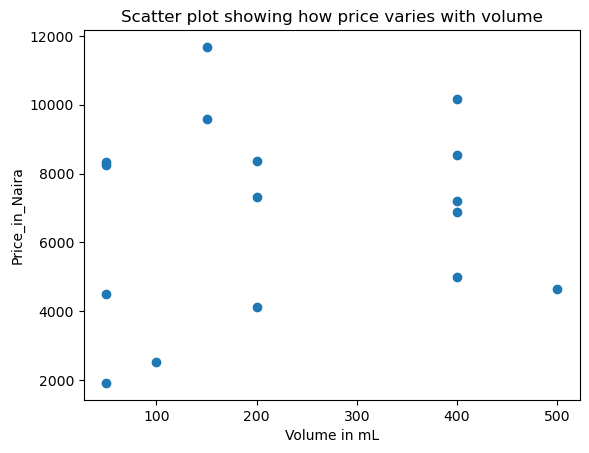

In [21]:
#Scatter plot showing price versus volume
plt.scatter(df_table["Volume in mL"], df_table["Price_in_Naira"])
plt.title("Scatter plot showing how price varies with volume")
plt.xlabel("Volume in mL")
plt.ylabel("Price_in_Naira");

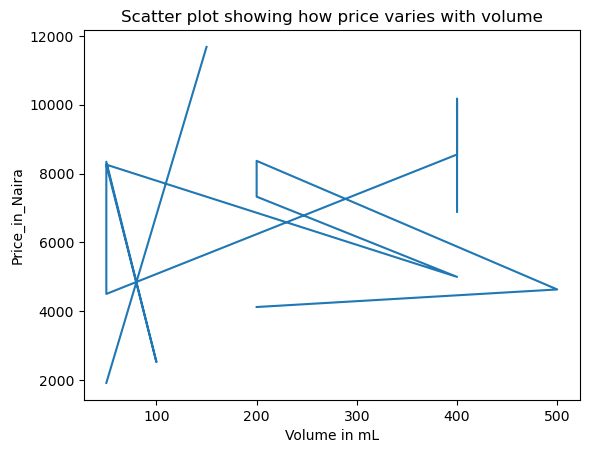

In [22]:
#Line plot showing price versus volume
plt.plot(df_table["Volume in mL"], df_table["Price_in_Naira"])
plt.title("Scatter plot showing how price varies with volume")
plt.xlabel("Volume in mL")
plt.ylabel("Price_in_Naira");

In [23]:
df_table.head()

,Product ID,Product Line Name,Brand Name,Product Name,Product Description,Product Images,Ingredients,Skin Concern,Source URL,Volume in mL,Barcode (EAN/UPC/SKU),Price_in_Naira
0,mpg1657713,NaN,NIVEA,NIVEA MEN Deep Body Lotion 400ml,NIVEA MEN Deep Body Lotion hydrates your skin ...,https://ng.jumia.is/unsafe/fit-in/500x500/filt...,"Deep Body Lotion: Water, Glycerin, Dimathicone...",dry skin,https://www.jumia.com.ng/nourishing-cocoa-body...,400.0,NI930ST265LM4NAFAMZ,6890.0
1,mpg1657699,NaN,NIVEA,NIVEA Perfect & Radiant Body Lotion For Women ...,NIVEA Perfect & Radiant Body Lotion is a daily...,https://ng.jumia.is/unsafe/fit-in/500x500/filt...,"Aqua, Dimethicone, Ethylhexyl Methoxycinnamate...",dry skin,https://www.jumia.com.ng/natural-fairness-clar...,400.0,NI930ST1WKIRWNAFAMZ,7205.0
2,mpg1657642,NaN,NIVEA,NIVEA DoShakara Pack - Nourishing Cocoa Body L...,NIVEA Nourishing Cocoa Body Lotion provides 48...,https://ng.jumia.is/unsafe/fit-in/500x500/filt...,"Aqua, Glycerin, Cetearyl Alcohol, Isohexadeca...",dry skin,https://www.jumia.com.ng/doshakara-pack-nouris...,400.0,NI930ST32OJ5WNAFAMZ,10175.0
3,104325862,NaN,NIVEA,NIVEA Radiant & Beauty Even Glow Body Lotion F...,NIVEA Radiant & Beauty Even Glow is formulated...,https://ng.jumia.is/unsafe/fit-in/500x500/filt...,"Aqua, Glycerin, Paraffinum, Liquidum, Ceteary...",dry skin,https://www.jumia.com.ng/nivea-radiant-beauty-...,400.0,NI930ST23IVW4NAFAMZ,8555.0
4,mpg1657646,NaN,NIVEA,"NIVEA Dry Comfort Roll-on For Women, 72h- 50ml...",NIVEA Dry Comfort anti-perspirant deodorant of...,https://ng.jumia.is/unsafe/fit-in/500x500/filt...,"Water, Aluminum Chlorohydrate, PPG-15 Stearyl ...",dry skin,https://www.jumia.com.ng/dry-comfort-roll-on-f...,50.0,NI930ST2Q7I1GNAFAMZ,4505.0


**EXPORTING THE CLEANED DATA TO CSV**

In [24]:
df_table.to_csv("skincare_products_data_scraped_from_nivea_jumia_by_Ahmed_Ramadan_Bamdele.csv", index=False)

<b> SECTION 2: IDENTIFYING PRODUCTS WITH MATCHING KEY INGREDIENTS </b>

In [25]:
#preprocess all ingredients. Make lowercase, remove trailing spaces around commas, and create list by splitting at the comma position
def preprocess_ingredients(individual_ingredients):
    #Make all characters lower case, and remove characters like ";" and ":"
    ing = individual_ingredients.lower().replace(";", "").replace(":", "").replace(".", "").strip()
    cleaned_ingredients = re.sub(r"\s*,\s*", ",", ing)
    individual_ingredient_list = cleaned_ingredients.split(",")
    return individual_ingredient_list

In [26]:
df_table["ingredient_list_column"] = df_table["Ingredients"].apply(preprocess_ingredients)


In [27]:
#Converts each row of the "ingredient_list_column" to a set
def to_set(individual_ingredient_list):
    set_list = set(individual_ingredient_list)
    return set_list
    

In [28]:
df_table["ingredient_set_column"] = df_table["ingredient_list_column"].apply(to_set)

In [29]:
df_table

,Product ID,Product Line Name,Brand Name,Product Name,Product Description,Product Images,Ingredients,Skin Concern,Source URL,Volume in mL,Barcode (EAN/UPC/SKU),Price_in_Naira,ingredient_list_column,ingredient_set_column
0,mpg1657713,NaN,NIVEA,NIVEA MEN Deep Body Lotion 400ml,NIVEA MEN Deep Body Lotion hydrates your skin ...,https://ng.jumia.is/unsafe/fit-in/500x500/filt...,"Deep Body Lotion: Water, Glycerin, Dimathicone...",dry skin,https://www.jumia.com.ng/nourishing-cocoa-body...,400.0,NI930ST265LM4NAFAMZ,6890.0,"[deep body lotion water, glycerin, dimathicone...","{bht, dimathicone, ppg-15 stearyl ether, sodiu..."
1,mpg1657699,NaN,NIVEA,NIVEA Perfect & Radiant Body Lotion For Women ...,NIVEA Perfect & Radiant Body Lotion is a daily...,https://ng.jumia.is/unsafe/fit-in/500x500/filt...,"Aqua, Dimethicone, Ethylhexyl Methoxycinnamate...",dry skin,https://www.jumia.com.ng/natural-fairness-clar...,400.0,NI930ST1WKIRWNAFAMZ,7205.0,"[aqua, dimethicone, ethylhexyl methoxycinnamat...","{bht, cetyl alcohol, ethylparaben, rubus fruti..."
2,mpg1657642,NaN,NIVEA,NIVEA DoShakara Pack - Nourishing Cocoa Body L...,NIVEA Nourishing Cocoa Body Lotion provides 48...,https://ng.jumia.is/unsafe/fit-in/500x500/filt...,"Aqua, Glycerin, Cetearyl Alcohol, Isohexadeca...",dry skin,https://www.jumia.com.ng/doshakara-pack-nouris...,400.0,NI930ST32OJ5WNAFAMZ,10175.0,"[aqua, glycerin, cetearyl alcohol, isohexadeca...","{paraffinum liquidum, butyrospermum parkii but..."
3,104325862,NaN,NIVEA,NIVEA Radiant & Beauty Even Glow Body Lotion F...,NIVEA Radiant & Beauty Even Glow is formulated...,https://ng.jumia.is/unsafe/fit-in/500x500/filt...,"Aqua, Glycerin, Paraffinum, Liquidum, Ceteary...",dry skin,https://www.jumia.com.ng/nivea-radiant-beauty-...,400.0,NI930ST23IVW4NAFAMZ,8555.0,"[aqua, glycerin, paraffinum, liquidum, ceteary...","{bht, dicaprylyl ether, prunus amygdalus dulci..."
4,mpg1657646,NaN,NIVEA,"NIVEA Dry Comfort Roll-on For Women, 72h- 50ml...",NIVEA Dry Comfort anti-perspirant deodorant of...,https://ng.jumia.is/unsafe/fit-in/500x500/filt...,"Water, Aluminum Chlorohydrate, PPG-15 Stearyl ...",dry skin,https://www.jumia.com.ng/dry-comfort-roll-on-f...,50.0,NI930ST2Q7I1GNAFAMZ,4505.0,"[water, aluminum chlorohydrate, ppg-15 stearyl...","{bht, benzyl salicylate, steareth-21, ppg-15 s..."
5,404436340,NaN,NIVEA,NIVEA Sun UV Sunscreen Face Shine Control Crea...,NIVEA SUN UV Face Shine Control Cream provides...,https://ng.jumia.is/unsafe/fit-in/500x500/filt...,"Aqua, Homosalate, Butyl Methoxydibenzoylmethan...",dry skin,https://www.jumia.com.ng/nivea-sun-uv-sunscree...,50.0,NI930ST6OQWTSNAFAMZ,8345.0,"[aqua, homosalate, butyl methoxydibenzoylmetha...","{ethylhexyl salicylate, glycyrrhiza inflata ro..."
6,117097341,NaN,NIVEA,NIVEA MEN Deep Aftershave Lotion - 100ml | Jum...,NIVEA MEN DEEP COMFORT After Shave Lotion supp...,https://ng.jumia.is/unsafe/fit-in/500x500/filt...,"Aqua, Alcohol Denat., Propylene Glycol, PEG-40...",dry skin,https://www.jumia.com.ng/nivea-men-deep-afters...,100.0,DE974ST1W3JGFNAFAMZ,2525.0,"[aqua, alcohol denat, propylene glycol, peg-40...","{peg-40 hydrogenated castor oil, geraniol, aqu..."
7,mpg1657697,NaN,NIVEA,NIVEA Perfect & Radiant Even Tone Day And Nigh...,NIVEA Perfect & Radiant Even Tone Day Cream SP...,https://ng.jumia.is/unsafe/fit-in/500x500/filt...,Perfect & Radiant Even Tone Day Cream SPF 15: ...,dry skin,https://www.jumia.com.ng/perfect-radiant-day-c...,50.0,NI930ST21XF7WNAFAMZ,8260.0,[perfect & radiant even tone day cream spf 15 ...,"{bht, microcrystalline wax, alcohol denat, avo..."
8,104320986,NaN,NIVEA,NIVEA Radiant & Beauty Advanced Care Body Loti...,NIVEA Radiant & Beauty Advanced Care is formul...,https://ng.jumia.is/unsafe/fit-in/500x500/filt...,"Aqua, Glycerin, Paraffinum, Liquidum, Ceteary...",dry skin,https://www.jumia.com.ng/nivea-radiant-beauty-...,400.0,NI930ST2SK5VONAFAMZ,5000.0,"[aqua, glycerin, paraffinum, liquidum, ceteary...","{bht, dicaprylyl ether, prunus amygdalus dulci..."
9,117097338,NaN,NIV

IDENTIFYING PRODUCTS WITH COMMON INGREDIENTS

In [30]:
df_table["ingredient_list_column"]

0     [deep body lotion water, glycerin, dimathicone...
1     [aqua, dimethicone, ethylhexyl methoxycinnamat...
2     [aqua, glycerin, cetearyl alcohol, isohexadeca...
3     [aqua, glycerin, paraffinum, liquidum, ceteary...
4     [water, aluminum chlorohydrate, ppg-15 stearyl...
5     [aqua, homosalate, butyl methoxydibenzoylmetha...
6     [aqua, alcohol denat, propylene glycol, peg-40...
7     [perfect & radiant even tone day cream spf 15 ...
8     [aqua, glycerin, paraffinum, liquidum, ceteary...
9     [propane, cyclomethicone, aluminum chlorohydra...
10    [aqua, glycerin, paraffinum liquidum, myristyl...
11    [water, sodium laureth sulfate, cocamidopropyl...
12    [isobutane, propane, cyclomethicone, aluminum ...
13    [octyldodecanol, hydrogenated rapeseed oil, ri...
14    [aqua, ethylhexyl methoxycinnamate, glycerin, ...
15    [ricinus communis seed oil, polyisobutene, oct...
16    [water, glycerin, alcohol denat, cetyl alcohol...
17    [aqua, aluminum chlorohydrate, ppg-15 stea

In [31]:
#Choose what you want to group by, it could be ID, product name, volume, etc...
v = df_table["Product Name"]
#converts the column extracted to a list
m = v.tolist()

In [32]:
#Function that generates the desired groups
def bot_grouper(m: List[str]) -> pd.DataFrame:
    #This matrix/list will contain our group
    intersect_matrix = [["Products_with_common_ingredient", "The_common_ingredients"]]
    #N uses combination to get the possible ways we can group m if no repetition is allowed.Each combination is what we will work on
    N = com(m, 2)
    for i in N:
        i
        #sets will hold ingredients temporarily pending when the common ingredients will be generated
        sets = []
        for val in range((len(i))):
            #Identification of the particular products that will be compared
            ID = i[val]
            #interstate simply checks for the product with the particular product name and then looks for the ingredients contained in the product
            #the Ingredient_set_column is chosen for better comparison
            inter_set = (df_table[(df_table["Product Name"] == ID)])["ingredient_set_column"].values[0]
            #The ingredients are then appended to sets temporarily
            sets.append(inter_set)
            #Lambda function is used to get the common ingredients in the sets
        intersection_result = reduce(lambda a, b: a & b, sets)
        #if condition checks if the common ingredients is at least 2. This is in accordance with the problem statement.
        if (len(intersection_result) >= 2):
            #Once the intersection satisfies the condition, it is stored in intersect_matrix along with the product names
            intersect_matrix.append([i, intersection_result])
    #The dataFrame is created and the required table containing the desired groupings is generated
    df_common_ingredients = pd.DataFrame(intersect_matrix[1:], columns=intersect_matrix[0])
    return df_common_ingredients  

In [33]:
df_common_ingredients = bot_grouper(m)

In [34]:
df_common_ingredients

,Products_with_common_ingredient,The_common_ingredients
0,"(NIVEA MEN Deep Body Lotion 400ml , NIVEA Perf...","{bht, geraniol, glycerin, trisodium edta, lina..."
1,"(NIVEA MEN Deep Body Lotion 400ml , NIVEA DoSh...","{bht, cetearyl alcohol, glycerin, sodium cetea..."
2,"(NIVEA MEN Deep Body Lotion 400ml , NIVEA Radi...","{parfum, cetearyl alcohol, bht, persea gratiss..."
3,"(NIVEA MEN Deep Body Lotion 400ml , NIVEA Dry ...","{bht, steareth-21, ppg-15 stearyl ether, geran..."
4,"(NIVEA MEN Deep Body Lotion 400ml , NIVEA Sun ...","{cetearyl alcohol, geraniol, glycerin, alcohol..."
...,...,...
138,"(NIVEA Lip Care Shine bundle - Blackberry, Str...","{bht, persea gratissima oil, aqua, linalool, l..."
139,(NIVEA Perfect & Radiant EvenTone Day Cream An...,"{bht, octyldodecanol, aqua, glycerin, glyceryl..."
140,(NIVEA Perfect & Radiant EvenTone Day Cream An...,"{geraniol, glycerin, alcohol denat, tocopheryl..."
141,(NIVEA Perfect & Radiant EvenTone Day Cream An...,"{bht, geraniol, aqua, alpha-isomethyl ionone, ..."


**Exporting the table showing the grouped products**

In [35]:
df_common_ingredients.to_csv("products_with_common_ingredients_by_Ahmed_Ramadan_Bamidele.csv")